In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [15]:
# load the data
df = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')
# df timestamp
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# data explore
print(df.head())


            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119578        5.208159  


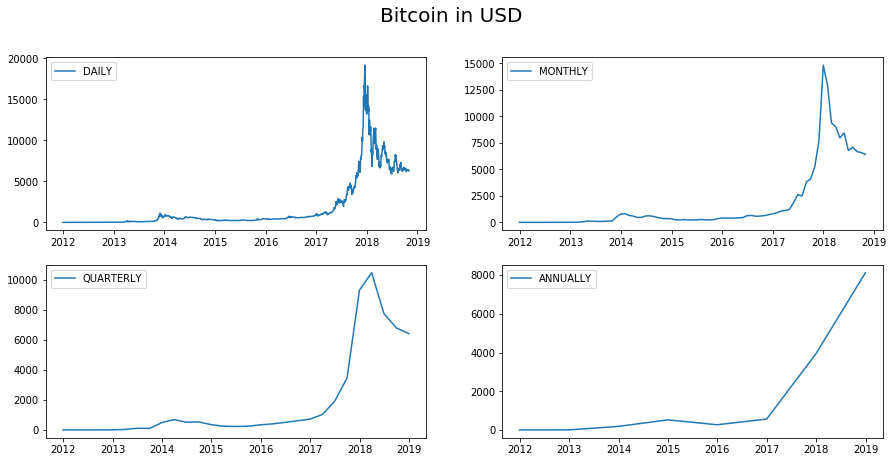

In [29]:
# Count in different time bases
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
# Plot the Bitcoin price using Daily, Monthly, Quarterly and Annually bases
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin in USD', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='DAILY')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='MONTHLY')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='QUARTERLY')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='ANNUALLY')
plt.legend()
plt.show()


In [17]:
# Range of Params
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
print(parameters_list)
# m
results = []
best_aic = float("inf") 
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('Param Error:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# Produce the best model
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('Best Model: ', best_model.summary())



[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Param Error: (0, 2)
Best Model:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.763
Date:                Thu, 22 Aug 2019   AIC                           1385.522
Time:                        18:12:32   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2093.5993   1566.837      1.336      0.185    -977.345    5164

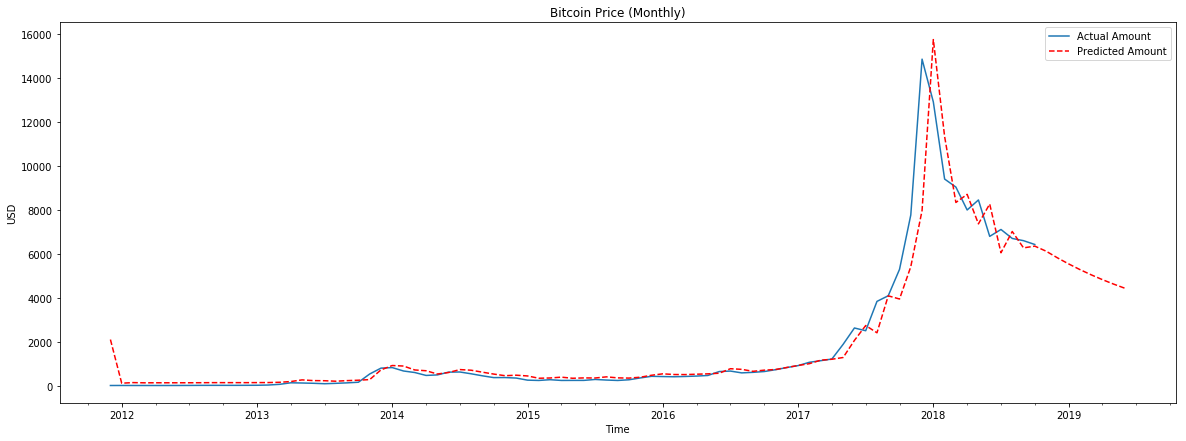

In [18]:
# Bitcoin Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
# Output Plot
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='Actual Amount')
df_month2.forecast.plot(color='r', ls='--', label='Predicted Amount')
plt.legend()
plt.title('Bitcoin Price (Monthly)')
plt.xlabel('Time')
plt.ylabel('USD')
plt.show()

In [8]:
# Range of Params
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
print(parameters_list)
# m
results = []
best_aic = float("inf") 
for param in parameters_list:
    try:
        model = ARMA(df_Q.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('Param Error:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# Produce the best model
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('Best Model: ', best_model.summary())

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Param Error: (0, 2)
Param Error: (2, 2)
Best Model:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   29
Model:                     ARMA(1, 1)   Log Likelihood                -244.743
Method:                       css-mle   S.D. of innovations           1069.026
Date:                Thu, 22 Aug 2019   AIC                            497.485
Time:                        18:08:10   BIC                            502.954
Sample:                    12-31-2011   HQIC                           499.198
                         - 12-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2178.3028   1656.576      1.315      0.200

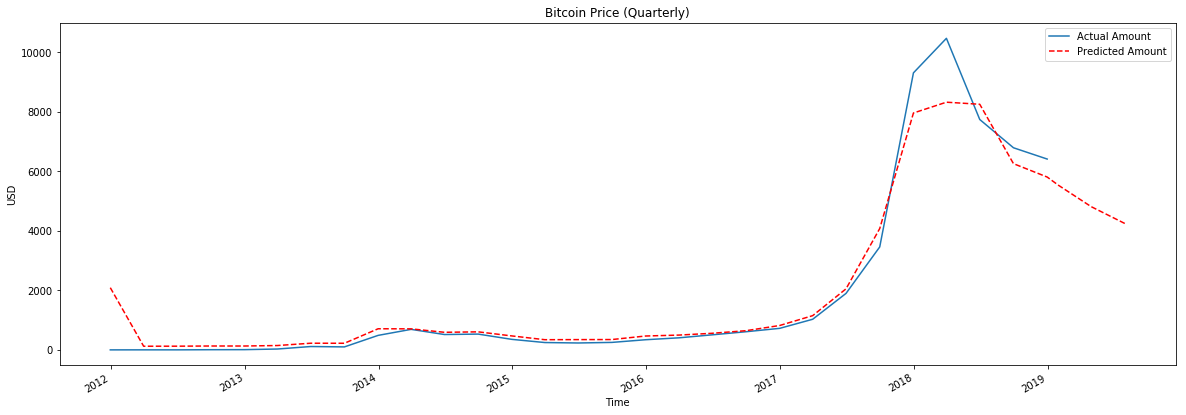

In [28]:
# Bitcoin Prediction
df_Q2 = df_Q[['Weighted_Price']]
date_list_Q = [datetime(2019, 1, 31), datetime(2019, 4, 30), datetime(2019, 7, 31)]
future = pd.DataFrame(index=date_list_Q, columns= df_Q.columns)
df_Q2 = pd.concat([df_Q2, future])
df_Q2['forecast'] = best_model.predict(start=0, end=200)

# Output Plot
plt.figure(figsize=(20,7))
df_Q2.Weighted_Price.plot(label='Actual Amount')
df_Q2.forecast.plot(color='r', ls='--', label='Predicted Amount')
plt.legend()
plt.title('Bitcoin Price (Quarterly)')
plt.xlabel('Time')
plt.ylabel('USD')
plt.show()